In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Ice Cream Sales.csv')

In [3]:
df.head()

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


In [4]:
df.shape

(365, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        365 non-null    int64  
 1   Ice Cream Profits  365 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.8 KB


<Axes: xlabel='Temperature', ylabel='Ice Cream Profits'>

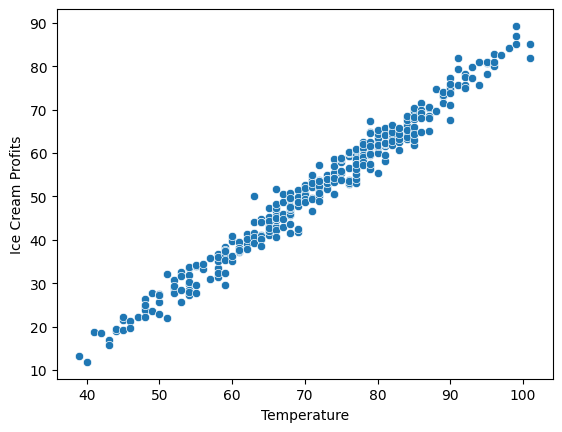

In [7]:
sns.scatterplot(data=df, x='Temperature', y='Ice Cream Profits')

In [8]:
X, y = df.drop('Ice Cream Profits', axis=1), df['Ice Cream Profits']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=14)

In [10]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)

SVR()

In [11]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mse

17.927529550032894

In [15]:
print('R2 Score:', r2_score(y_test, y_pred))

R2 Score: 0.929728103454361


In [16]:
param_grid = {'C': [0.1, 1, 10, 50, 100,],
              'kernel': ['linear']}

In [18]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVR(), param_grid, verbose=3)

In [19]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.974 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.971 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.978 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.979 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.980 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.975 total time=   0.1s
[CV 2/5] END ................C=1, kernel=linear;, score=0.971 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.978 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.979 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=0.980 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.975 total time=   0.3s
[CV 2/5] END ...............C=10, kernel=linear;,

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 50, 100], 'kernel': ['linear']},
             verbose=3)

In [20]:
y_pred_grid = grid.predict(X_test)

In [21]:
print('R2 Score:', r2_score(y_test, y_pred_grid))

R2 Score: 0.9742728269573263
